In [4]:
#Let's import the packages to be used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#And the models we are going to use.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## 1. **Importing and Exploring the dataset:**

In [6]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape
#We have 299 rows and 13 columns

(299, 13)

In [9]:
#Let's see what our columns are:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [11]:
#Looking at our data, we see have categorical and continous values. Splitting for analysis would help.
categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]


### CATEGORICAL DATA REMARKS

* **Anaemia**: A value of 0 indicates the absence of anaemia, while a value of 1 signifies its presence.

* **Diabetes**: A value of 0 signifies the absence of diabetes, while a value of 1 indicates its presence.

* **High Blood Pressure**: A value of 0 denotes the absence of high blood pressure, and a value of 1 indicates its presence.

* **Smoking**: A value of 0 signifies non-smoking, while a value of 1 indicates smoking.

* **Sex**: A value of 0 corresponds to female, and 1 corresponds to male.

* **Death Event**: A value of 0 suggests that heart failure is not the cause of death, whereas a value of 1 implies that it is.

In [12]:
pd.set_option('display.max_rows', 300) #We set the max number of rows to be displayed to 300.
data.isna().sum() #We also calculate the sum of missing values (NaN or null values) for each column

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

###We do not have missing data in our set.

In [13]:
data.isnull().sum() #To check if the data contains null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

###The dataset does not contain null values either.

In [14]:
continuous_variables.describe() #Descriptive Statistics: Mean, Std, Min-Max and Quartiles.

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [15]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


### NOTE ABOUT GROUPING:
Given that our outcome variable is **DEATH_EVENT**, we organized our dataset by grouping it based on DEATH_EVENT.

From this grouping, it becomes evident that our dataset is _imbalanced_, as the total number of deaths **(96)** is less than half of the total individuals who did not experience heart failure-related deaths **(203)**.

In [16]:
age = data[["age"]]
platelets = data[["platelets"]]

Illustrating the imbalanced dataset through a **scatter plot** below, where the color scheme is contingent on the **DEATH_EVENT** labels (0 or 1).

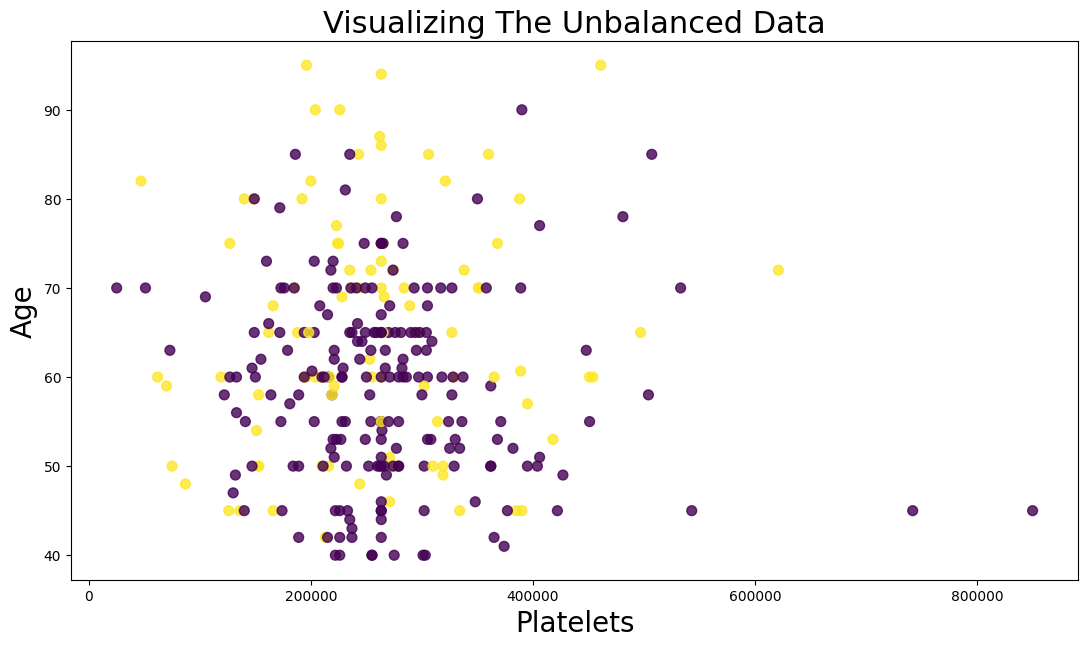

In [17]:
plt.figure(figsize=(13,7))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=50, alpha=0.8)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing The Unbalanced Data", fontsize=22)
plt.show()

Obviously, we have more purple circles than yellow ones.

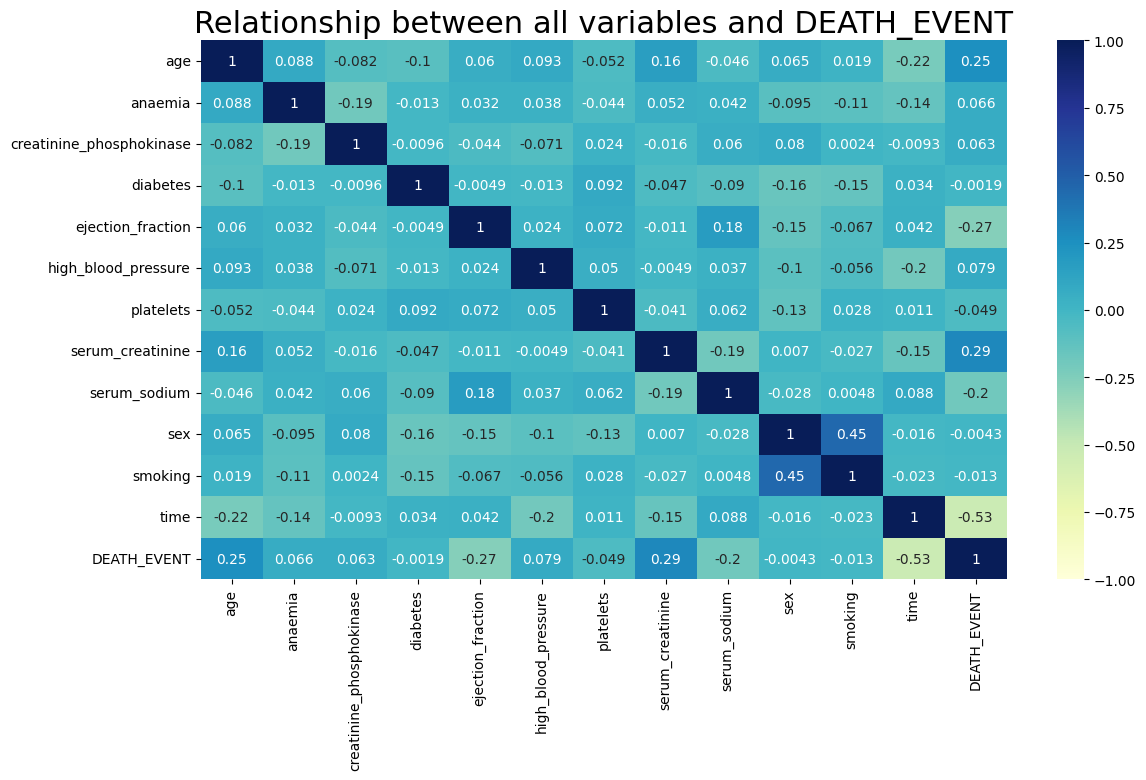

In [18]:
#Let's see how all variables are correlated with DEATH_EVENT with a heatmap.
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all variables and DEATH_EVENT", fontsize = 22)
plt.show()

#Running this code, we see which variables have positive and which of them have negative correlation in what values 0-1 with Death_Event.

## 2. **Data Visualization**

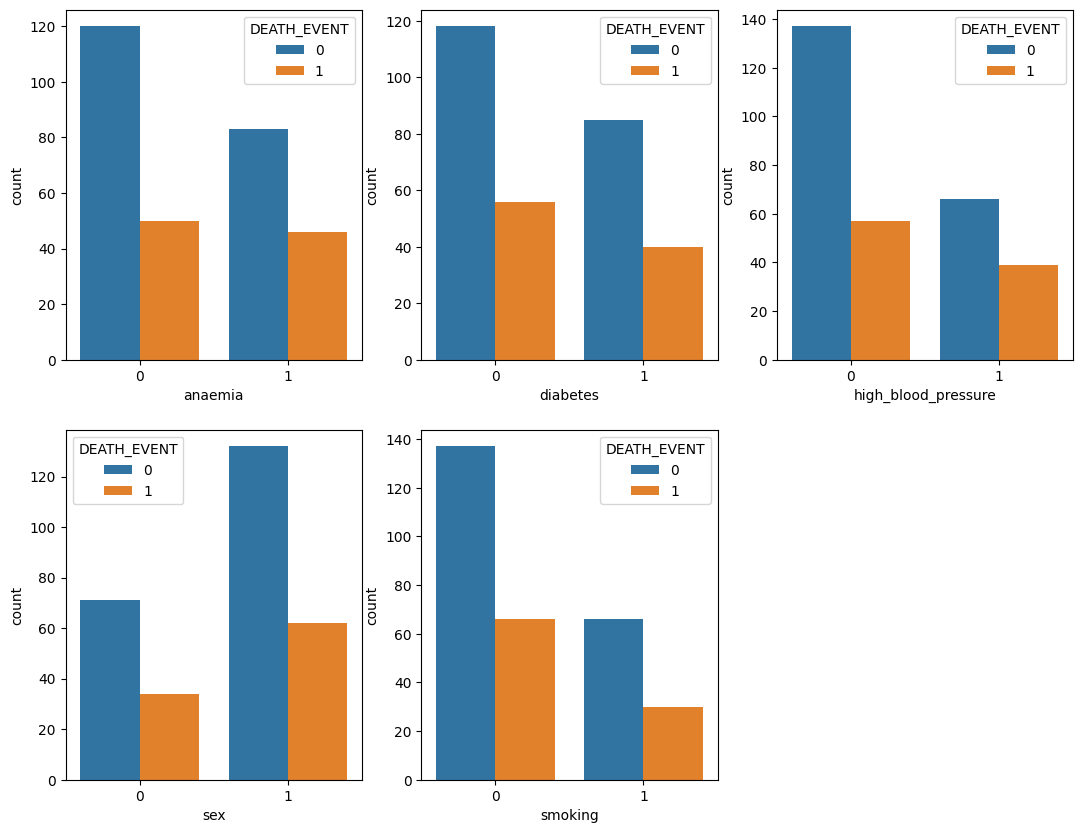

In [19]:
# Let's plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_variables):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

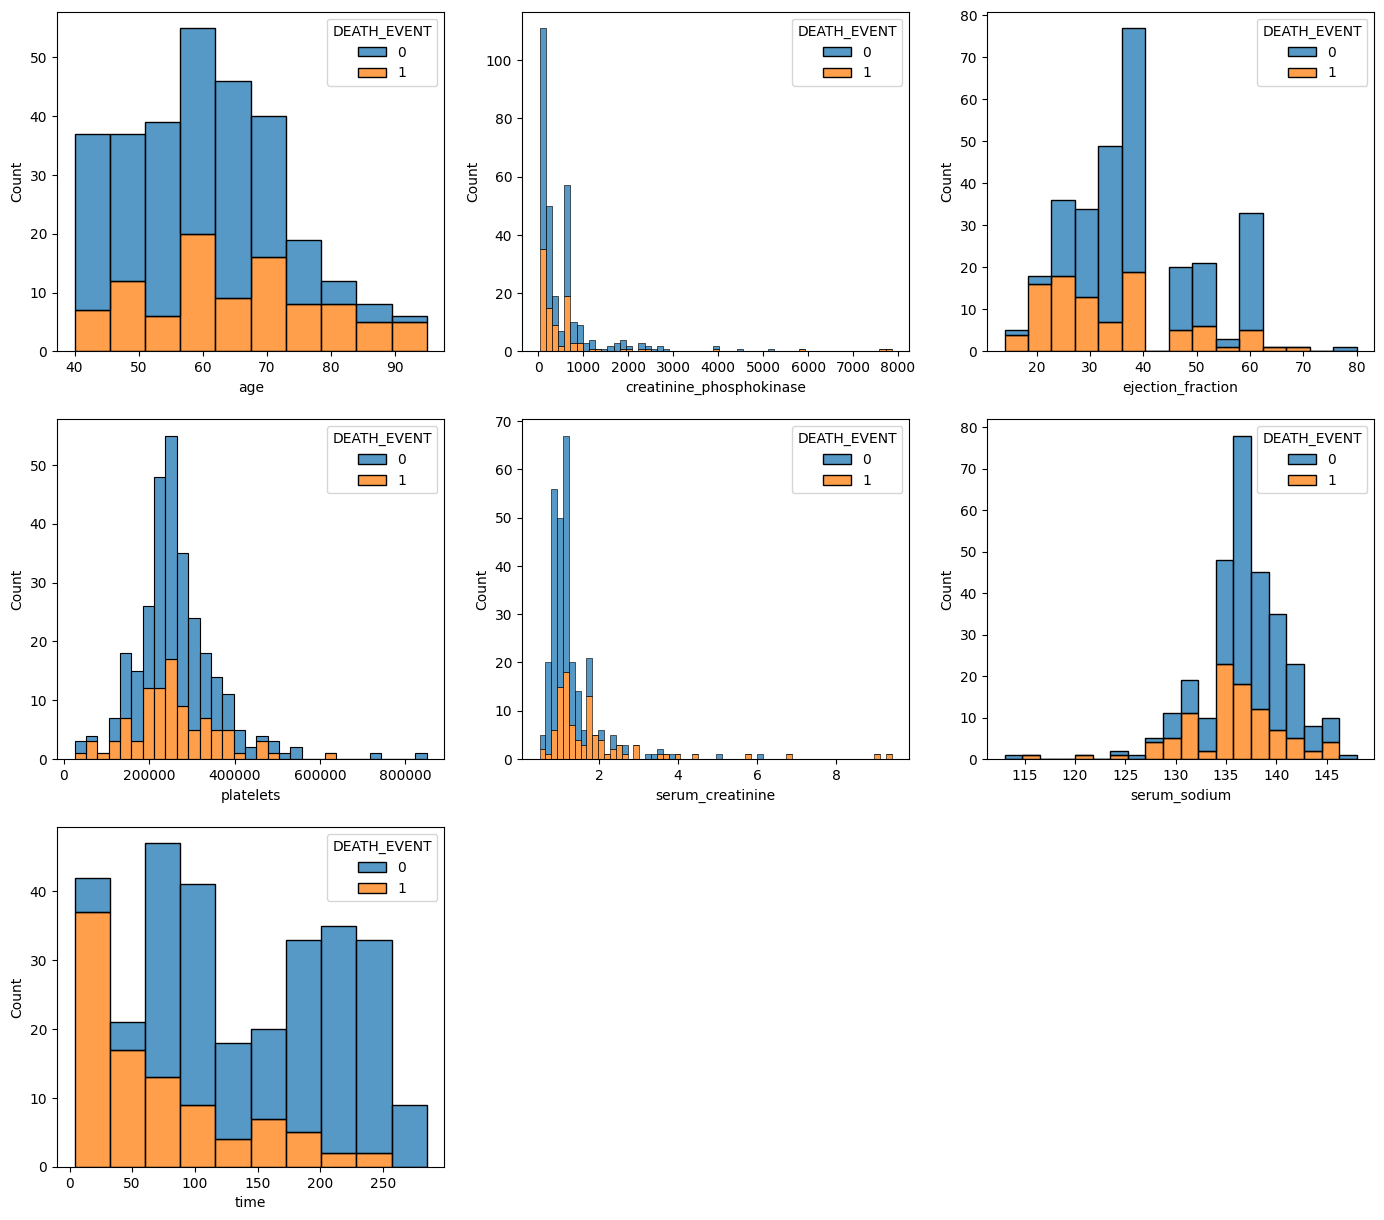

In [20]:
# Next is plotting the impact of continuous variables on DEATH_EVENT using stackbar graphs.

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_variables):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

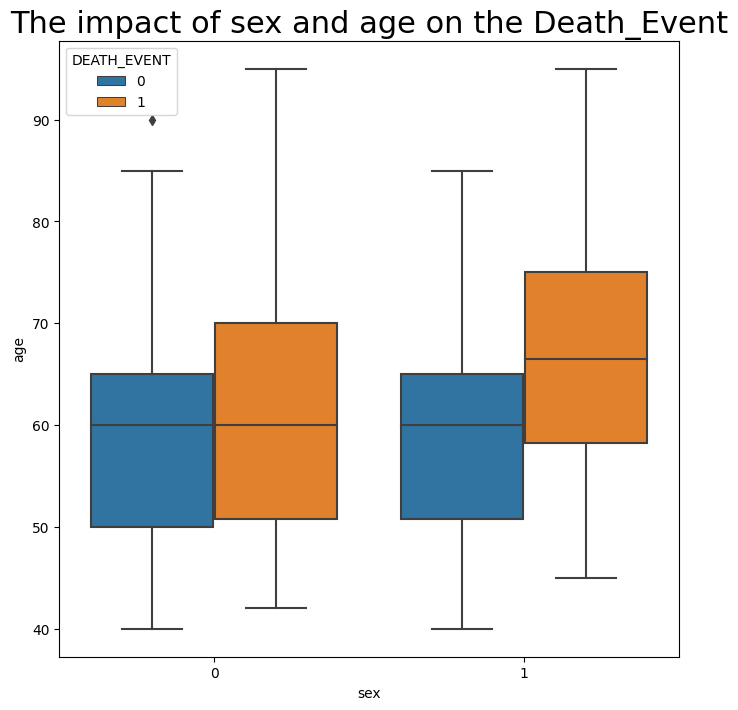

In [21]:
# Visualizing the relationship between sex, age, and death events using a boxplot.
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the Death_Event", fontsize=22)
plt.show()

##### **ANALYSIS OF SURVIVAL ON SMOKING**

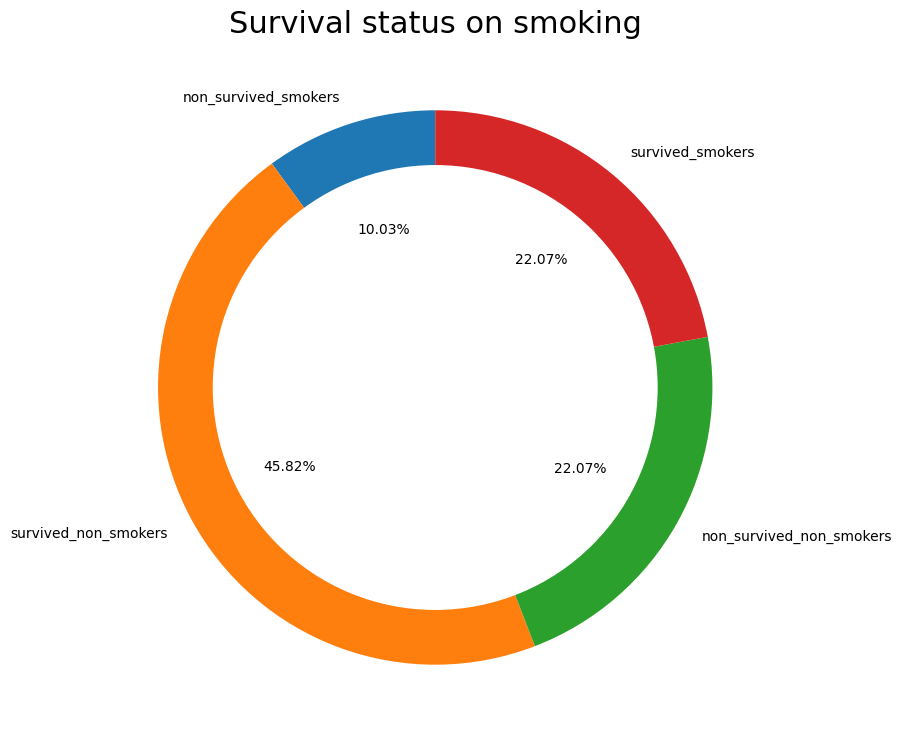

In [24]:
# Creating separate DataFrames for smokers & non-smokers based on the "smoking" column.
smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

# Creating lists for the count of individuals in different smoking and survival categories.
smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

# Pie chart visualizing the distribution of survival status among different smoking categories.
plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()